In [33]:
import numpy as np
x = np.array([1.0, 2.0, 3.0])
y = np.array([1.0, 2.0, 3.0])

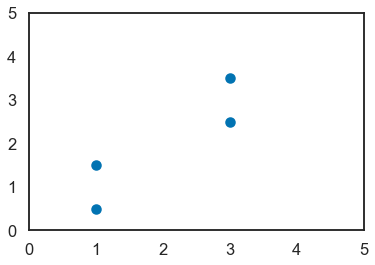

In [90]:
# show the point in drawings
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='white', context='talk', palette='colorblind')
plt.scatter(x, y)
heightOfCanvas = 5
plt.xlim(0, heightOfCanvas)
plt.ylim(0, heightOfCanvas)
plt.show()

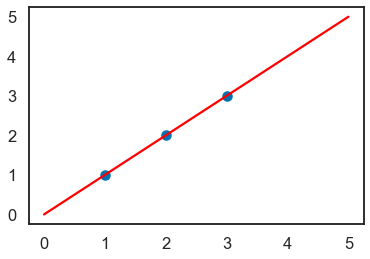

In [35]:
plt.scatter(x, y)
x = [0.0, heightOfCanvas]
plt.plot(x, x, color='red')
plt.show()

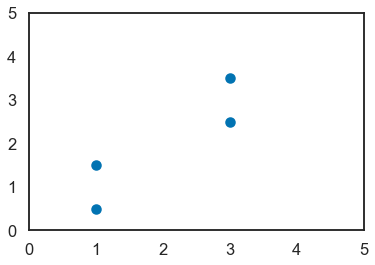

In [82]:
x = np.array([1.0, 1.0, 3.0, 3.0])
offset = 0.5
y = x + offset * np.array([-1.0, 1.0, -1.0, 1.0])
plt.scatter(x, y)
plt.xlim(0, heightOfCanvas)
plt.ylim(0, heightOfCanvas)
plt.show()

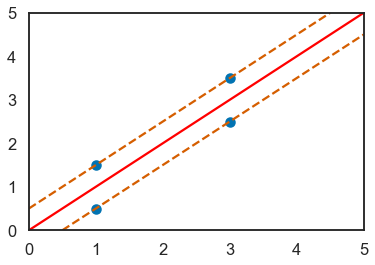

In [84]:
plt.scatter(x, y)

# dotted line 1
x1 = np.array([0.0, heightOfCanvas-offset])
y1 = np.array([offset, heightOfCanvas])
plt.plot(x1, y1, 'r--')

# dotted line 2
x2 = np.array([offset, heightOfCanvas])
y2 = np.array([0, heightOfCanvas-offset])
plt.plot(x2, y2, 'r--')

#plt.plot()
x3 = [0.0, heightOfCanvas]
plt.plot(x3, x3, color='red')
plt.xlim(0, heightOfCanvas)
plt.ylim(0, heightOfCanvas)
plt.show()

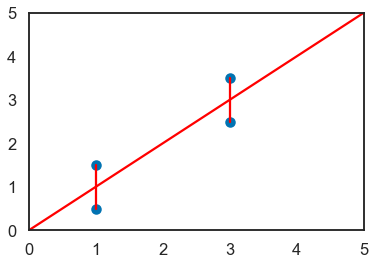

In [91]:
plt.scatter(x, y)
plt.plot(x3, x3, color='red')

# show distance between points and solid lines
for i in range(x.size):
    x_1_temp = x[i]
    y_1_temp = y[i]
    x_2_temp = x[i]
    y_2_temp = x[i]
    plt.plot(np.array([x_1_temp, x_2_temp]), np.array([y_1_temp, y_2_temp]), color='red')

plt.xlim(0, heightOfCanvas)
plt.ylim(0, heightOfCanvas)
plt.show()

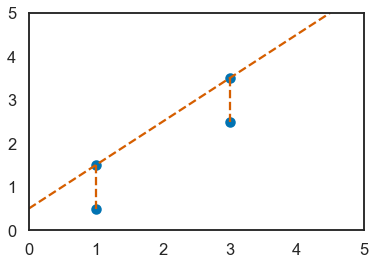

In [92]:
plt.scatter(x, y)
plt.plot(x1, y1, 'r--')

# show distance between points and solid lines
for i in range(x.size):
    if i % 2 == 0:
        continue
    x_1_temp = x[i]
    y_1_temp = y[i]
    x_2_temp = x[i]
    y_2_temp = 2 * x[i] - y[i]
    plt.plot(np.array([x_1_temp, x_2_temp]), np.array([y_1_temp, y_2_temp]), 'r--')

plt.xlim(0, heightOfCanvas)
plt.ylim(0, heightOfCanvas)
plt.show()

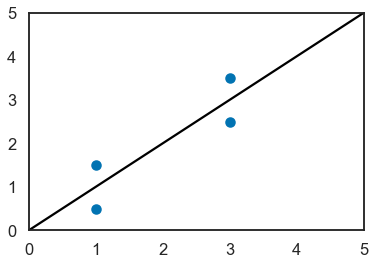

In [135]:
# code are from https://blog.csdn.net/jayloncheng/article/details/80300724
m = len(x);sum_x = np.sum(x);sum_y = np.sum(y);sum_xy = np.sum(x * y);sum_xx = np.sum(x * x)
a = (sum_y * sum_xx - sum_x * sum_xy) / (m * sum_xx - sum_x ** 2)
b = (m * sum_xy - sum_x * sum_y) / (m * sum_xx - sum_x * sum_x)
plt.scatter(x, y)
true_x = np.array([0.0, heightOfCanvas])
true_y = np.array([a, a + b * heightOfCanvas])
plt.plot(true_x, true_y, color='black')
plt.xlim(0, heightOfCanvas)
plt.ylim(0, heightOfCanvas)
plt.show()

In [238]:
import tensorflow as tf
from tensorflow import keras

# prepare model
epoch = 100
model = keras.Sequential([keras.layers.Dense(1, input_shape=(2,), kernel_initializer='ones', bias_initializer=keras.initializers.Constant(-4.), name='layer1')])
model.compile(optimizer=keras.optimizers.Adam(0.1), loss='mean_squared_error')
model.build(input_shape=[2])
zeroTrue = np.zeros(m)

# train
model.fit(np.dstack((x, y))[0], zeroTrue, batch_size=1, epochs=epoch)

Epoch 1/100
4/4 [==============================] - 0s 1000us/step - loss: 5.6027
Epoch 2/100
4/4 [==============================] - 0s 1ms/step - loss: 3.4882
Epoch 3/100
4/4 [==============================] - 0s 1ms/step - loss: 3.2168
Epoch 4/100
4/4 [==============================] - 0s 993us/step - loss: 3.2252
Epoch 5/100
4/4 [==============================] - 0s 998us/step - loss: 2.9017
Epoch 6/100
4/4 [==============================] - 0s 1ms/step - loss: 2.5452
Epoch 7/100
4/4 [==============================] - 0s 1ms/step - loss: 2.3322
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 2.1889
Epoch 9/100
4/4 [==============================] - 0s 749us/step - loss: 1.9829
Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: 1.7683
Epoch 11/100
4/4 [==============================] - 0s 1ms/step - loss: 1.6748
Epoch 12/100
4/4 [==============================] - 0s 999us/step - loss: 1.5039
Epoch 13/100
4/4 [==============================] 

[array([[ 0.01550486],
       [-0.01254889]], dtype=float32), array([-0.00479143], dtype=float32)]


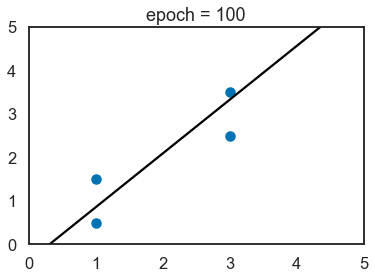

In [239]:
# get the weights and show it in drawings
weights = model.get_layer('layer1').get_weights()
print (weights)
w1 = weights[0][0];w2 = weights[0][1];b = weights[1][0]
plt.scatter(x, y)
true_x = np.array([0.0, heightOfCanvas])
true_y = np.array([- b / w2, (-b - w1 * heightOfCanvas) / w2])
plt.plot(true_x, true_y, color='black')
plt.title("epoch = %s" % str(epoch))
plt.xlim(0, heightOfCanvas)
plt.ylim(0, heightOfCanvas)
plt.show()